In [1]:
# MNIST 와 fashion MNIST 데이터를 이용한 다층 퍼셉트론을 인식하는 프로그램

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [4]:
# mnist 읽어 와서 싱경망에 입력하는 형태로 변환
(x_train,y_train),(x_test,y_test)= mnist.load_data()

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_train[0].shape

(28, 28)

In [7]:
import matplotlib.pyplot as plt

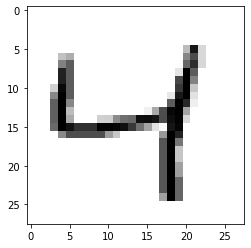

In [8]:
plt.imshow(x_train[2],cmap='gray_r')
plt.show()

In [9]:
x_train = x_train.reshape(-1,28*28)
x_test = x_test.reshape(-1,28*28)

In [10]:
# 데이터의 범위를 조정 - 전처리 -  0 ~1 사이의 값을 갖도록
# 이미지는 0 ~ 255   0~1 조정
# 일반화(Normalization) vs 표준화(Standardization)

In [11]:
# 일반화(Normalization)
# x =  (x - min(x)) / max(x) - min(x)   0 ~ 1 사의의 값으로 축소
# 최소는 0 최대는 1 나머지는 정규화 형태 원래데이터의 분포는 손실되지 않는다. 

In [12]:
# 표준화 
# 평균에 비해서 최대값이 멀리떨어져 있는경우 - outlier가 존재
# z-score를 먼저 계산해야 한다.
# z = (x - m) / std    평균에서 크게 벗어난 outlier일수록 큰 절대 값을 갖는다
# 이 score -2 ~ 2를 벗어난 값들은 모두 지워 

In [13]:
#일반화(정규화)
x_train =  x_train.astype(np.float32)/255.0
x_test = x_test.astype(np.float32)/255.0

In [14]:
#  라벨정보는 원핫인코딩
y_train = tf.keras.utils.to_categorical(y_train,10)
y_test = tf.keras.utils.to_categorical(y_test,10)

In [15]:
x_train.shape

(60000, 784)

In [17]:
n_input = 784
n_output = 10
n_hidden = 784*2

In [24]:
# 신경망 설계  - 두번째 hidden층부터는 초기화는 선택이다.
model = Sequential()
dense1 = Dense(units=n_hidden,activation='tanh',input_shape=(n_input,)
               ,kernel_initializer='random_uniform', bias_initializer='zeros')
dense2 = Dense(units=n_output,activation='tanh')
model.add(dense1)
model.add(dense2)
model.compile(loss='mean_squared_error'
              , optimizer=Adam(learning_rate=0.001),metrics=['accuracy'] )


In [25]:
hist = model.fit(x_train, y_train, batch_size=128, epochs=30
                 ,validation_data=(x_test,y_test))

Epoch 1/30
469/469 [==============================] - 7s 15ms/step - loss: 0.0570 - accuracy: 0.8160 - val_loss: 0.0328 - val_accuracy: 0.9043
Epoch 2/30
469/469 [==============================] - 7s 15ms/step - loss: 0.0258 - accuracy: 0.9247 - val_loss: 0.0214 - val_accuracy: 0.9391
Epoch 3/30
469/469 [==============================] - 7s 16ms/step - loss: 0.0194 - accuracy: 0.9449 - val_loss: 0.0177 - val_accuracy: 0.9491
Epoch 4/30
469/469 [==============================] - 7s 15ms/step - loss: 0.0160 - accuracy: 0.9546 - val_loss: 0.0154 - val_accuracy: 0.9571
Epoch 5/30
469/469 [==============================] - 7s 14ms/step - loss: 0.0141 - accuracy: 0.9610 - val_loss: 0.0132 - val_accuracy: 0.9607
Epoch 6/30
469/469 [==============================] - 6s 13ms/step - loss: 0.0125 - accuracy: 0.9661 - val_loss: 0.0124 - val_accuracy: 0.9641
Epoch 7/30
469/469 [==============================] - 6s 13ms/step - loss: 0.0115 - accuracy: 0.9694 - val_loss: 0.0120 - val_accuracy: 0.9646

In [26]:
res = model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0076 - accuracy: 0.9768


In [27]:
res

[0.0075981286354362965, 0.9768000245094299]

In [30]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [31]:
import seaborn as sns

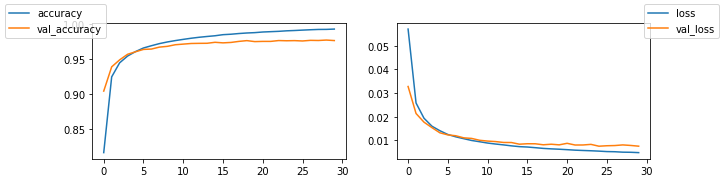

In [50]:
fig, ax =  plt.subplots(1,2,figsize=(10,2.5))
sns.lineplot(data=hist.history['accuracy'],ax=ax[0])
sns.lineplot(data=hist.history['val_accuracy'],ax=ax[0])
fig.legend(['accuracy','val_accuracy'],loc = 'upper left')

sns.lineplot(data=hist.history['loss'],ax=ax[1])
sns.lineplot(data=hist.history['val_loss'],ax=ax[1])
fig.legend(['loss','val_loss'])

plt.show()

In [51]:
# 위의 결과에 따라서 epoch는 15로 보며 된다.

In [52]:
# fashion MNIST
from tensorflow.keras.datasets import fashion_mnist

In [53]:
(x_train,y_train),(x_test,y_test) =  fashion_mnist.load_data()

In [54]:
x_train.shape

(60000, 28, 28)

In [56]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

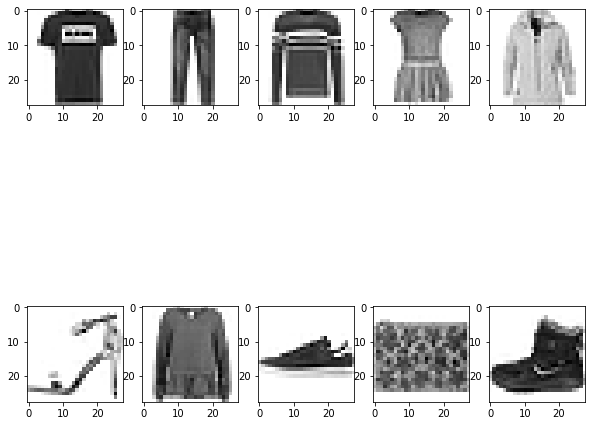

In [68]:
# plt.figure(figsize=(5,5) )
fig,ax = plt.subplots(2,5,figsize=(10,10))
for i in range(10):
    imagedata = x_train[y_train == i][0]
    ax[i//5,i%5].imshow(imagedata,cmap='gray_r')    

In [70]:
model = Sequential()
dense1 = Dense(units=n_hidden,activation='tanh',input_shape=(n_input,)
               ,kernel_initializer='random_uniform', bias_initializer='zeros')
dense2 = Dense(units=n_output,activation='tanh')
model.add(dense1)
model.add(dense2)
model.compile(loss='mean_squared_error'
              , optimizer=Adam(learning_rate=0.001),metrics=['accuracy'] )
x_train = x_train.reshape(-1,28*28)  # 차수변경 3->2
x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.reshape(-1,28*28)
x_test = x_test.astype(np.float32) / 255.0

# 정답은 one hot encoding
y_train =  tf.keras.utils.to_categorical(y_train)
y_test =  tf.keras.utils.to_categorical(y_test)

hist = model.fit(x_train, y_train, batch_size=128, epochs=30
                 ,validation_data=(x_test,y_test))

Epoch 1/30
469/469 [==============================] - 7s 15ms/step - loss: 0.3257 - accuracy: 0.0950 - val_loss: 0.3040 - val_accuracy: 0.0938
Epoch 2/30
469/469 [==============================] - 7s 14ms/step - loss: 0.2959 - accuracy: 0.0962 - val_loss: 0.2938 - val_accuracy: 0.0973
Epoch 3/30
469/469 [==============================] - 6s 14ms/step - loss: 0.2937 - accuracy: 0.0984 - val_loss: 0.2943 - val_accuracy: 0.0993
Epoch 4/30
469/469 [==============================] - 7s 15ms/step - loss: 0.2922 - accuracy: 0.0995 - val_loss: 0.2921 - val_accuracy: 0.0999
Epoch 5/30
469/469 [==============================] - 6s 14ms/step - loss: 0.2907 - accuracy: 0.0998 - val_loss: 0.2910 - val_accuracy: 0.1001
Epoch 6/30
469/469 [==============================] - 6s 13ms/step - loss: 0.2905 - accuracy: 0.0999 - val_loss: 0.2925 - val_accuracy: 0.1001
Epoch 7/30
469/469 [==============================] - 6s 13ms/step - loss: 0.2891 - accuracy: 0.1000 - val_loss: 0.2913 - val_accuracy: 0.1001

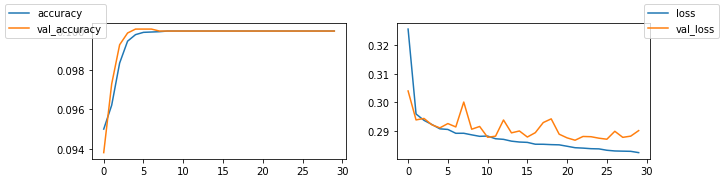

In [71]:
fig, ax =  plt.subplots(1,2,figsize=(10,2.5))
sns.lineplot(data=hist.history['accuracy'],ax=ax[0])
sns.lineplot(data=hist.history['val_accuracy'],ax=ax[0])
fig.legend(['accuracy','val_accuracy'],loc = 'upper left')

sns.lineplot(data=hist.history['loss'],ax=ax[1])
sns.lineplot(data=hist.history['val_loss'],ax=ax[1])
fig.legend(['loss','val_loss'])

plt.show()

In [72]:
#위의 표를 보고 epoch는 10이 적당한것 같음

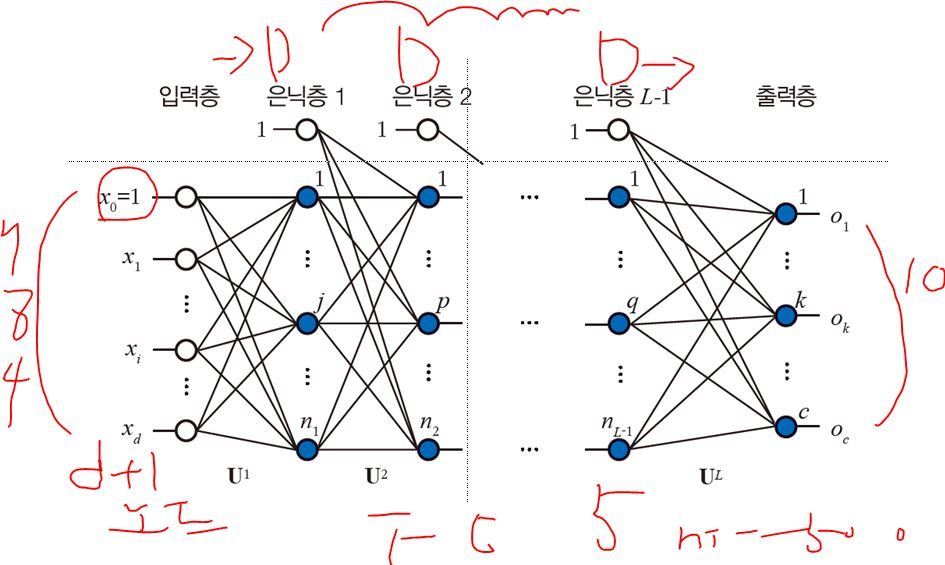

In [73]:
# 깊은 다층 퍼셉트론 DMLP(deep MLP) 구조
# ni  : i번째 은닉층에 ni개의 노드(ni 하이퍼 파라메터)
# ni = 500 가정하고 모든 은닉층이 같은 노드의 개수를 리턴하면
# L=5
# (784+1)*500 + (500+1)*500*3 + (500+1)*10 = 1,149,010
from IPython import display
display.Image('E:/1 강남야간/img/020.jpg',width=500, height=500)